In [118]:
import pandas as pd
import requests
from IPython.display import clear_output
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [119]:
#read weather CSV data file and crop yield files by state
df = pd.read_csv('aggregated_weather.csv')
mo_yields_df = pd.read_csv('mo_yields.csv')
tx_yields_df = pd.read_csv('tx_yields.csv')
il_yields_df = pd.read_csv('il_yields.csv')
ia_yields_df = pd.read_csv('ia_yields.csv')
ks_yields_df = pd.read_csv('ks_yields.csv')


In [120]:
df['DATE'].dtype

dtype('O')

In [121]:
ks_yields_df['Year']=ks_yields_df['Year'].astype('str')
mo_yields_df['Year']=mo_yields_df['Year'].astype('str')
il_yields_df['Year']=il_yields_df['Year'].astype('str')
ia_yields_df['Year']=ia_yields_df['Year'].astype('str')
tx_yields_df['Year']=tx_yields_df['Year'].astype('str')

In [128]:
df['DATE']=pd.to_datetime(df['DATE'])
df['MONTH']=[d.strftime('%B')for d in df['DATE']]
df['YEAR']=[d.strftime('%Y')for d in df['DATE']]

In [140]:
#clean up the data by removing unnecessary columns and merging COUNTY_STATE
df['COUNTY_STATE']=df['COUNTY']+', '+df['STATE']
df=df.drop(columns=['Fastest 2-minute wind speed (MPH)','LONGITUDE','LATITUDE','Fastest 5-minute wind speed (MPH)','Direction of fastest 2-minute wind speed','ELEVATION','Direction of fastest 5-minute wind speed'])
df.head()

,STATION,Precipitation (Inches),DATE,Average daily wind speed (MPH),Maximum temperature (F),Minimum temperature (F),COUNTY_STATE,COUNTY,STATE,MONTH,YEAR
0,USW00013993,0.0,2000-01-01,8.50,60,30,"BUCHANAN, MISSOURI",BUCHANAN,MISSOURI,January,2000
1,USW00013993,0.0,2000-01-02,11.63,56,29,"BUCHANAN, MISSOURI",BUCHANAN,MISSOURI,January,2000
2,USW00013993,0.0,2000-01-03,14.09,37,30,"BUCHANAN, MISSOURI",BUCHANAN,MISSOURI,January,2000
3,USW00013993,0.0,2000-01-04,12.30,30,13,"BUCHANAN, MISSOURI",BUCHANAN,MISSOURI,January,2000
4,USW00013993,0.0,2000-01-05,12.75,49,16,"BUCHANAN, MISSOURI",BUCHANAN,MISSOURI,January,2000


In [141]:
summer_weather=df.loc[(df['MONTH']=='May')|(df['MONTH']=='June')|(df['MONTH']=='July')|(df['MONTH']=='August')]


In [142]:
mo_weather=summer_weather.loc[summer_weather['STATE']=='MISSOURI']
tx_weather=summer_weather.loc[summer_weather['STATE']=='TEXAS']
il_weather=summer_weather.loc[summer_weather['STATE']=='ILLINOIS']
ia_weather=summer_weather.loc[summer_weather['STATE']=='IOWA']
ks_weather=summer_weather.loc[summer_weather['STATE']=='KANSAS']

In [143]:
group_tx_weather = tx_weather.groupby(['COUNTY_STATE','YEAR','MONTH'])
group_mo_weather = mo_weather.groupby(['COUNTY_STATE','YEAR','MONTH'])
group_il_weather = il_weather.groupby(['COUNTY_STATE','YEAR','MONTH'])
group_ia_weather = ia_weather.groupby(['COUNTY_STATE','YEAR','MONTH'])
group_ks_weather = ks_weather.groupby(['COUNTY_STATE','YEAR','MONTH'])


In [144]:
tx_precip = pd.DataFrame(group_tx_weather['Precipitation (Inches)'].sum())
tx_precip.reset_index(inplace=True)
mo_precip = pd.DataFrame(group_mo_weather['Precipitation (Inches)'].sum())
mo_precip.reset_index(inplace=True)
il_precip = pd.DataFrame(group_il_weather['Precipitation (Inches)'].sum())
il_precip.reset_index(inplace=True)
ia_precip = pd.DataFrame(group_ia_weather['Precipitation (Inches)'].sum())
ia_precip.reset_index(inplace=True)
ks_precip = pd.DataFrame(group_ks_weather['Precipitation (Inches)'].sum())
ks_precip.reset_index(inplace=True)

In [152]:
tx_temp = pd.DataFrame(group_tx_weather[['Maximum temperature (F)', 'Minimum temperature (F)']].mean())
mo_temp = pd.DataFrame(group_mo_weather[['Maximum temperature (F)', 'Minimum temperature (F)']].mean())
il_temp = pd.DataFrame(group_il_weather[['Maximum temperature (F)', 'Minimum temperature (F)']].mean())
ia_temp = pd.DataFrame(group_ia_weather[['Maximum temperature (F)', 'Minimum temperature (F)']].mean())
ks_temp = pd.DataFrame(group_ks_weather[['Maximum temperature (F)', 'Minimum temperature (F)']].mean())


In [153]:
tx_monthly_summary = pd.merge(tx_precip, tx_temp, on=['COUNTY_STATE','YEAR','MONTH'])
mo_monthly_summary = pd.merge(mo_precip, mo_temp, on=['COUNTY_STATE','YEAR','MONTH'])
il_monthly_summary = pd.merge(il_precip, il_temp, on=['COUNTY_STATE','YEAR','MONTH'])
ia_monthly_summary = pd.merge(ia_precip, ia_temp, on=['COUNTY_STATE','YEAR','MONTH'])
ks_monthly_summary = pd.merge(ks_precip, ks_temp, on=['COUNTY_STATE','YEAR','MONTH'])
mo_monthly_summary.head()

,COUNTY_STATE,YEAR,MONTH,Precipitation (Inches),Maximum temperature (F),Minimum temperature (F)
0,"ADAIR, MISSOURI",2000,August,3.33,84.466667,66.300000
1,"ADAIR, MISSOURI",2000,July,1.58,82.466667,64.800000
2,"ADAIR, MISSOURI",2000,June,6.94,78.666667,59.066667
3,"ADAIR, MISSOURI",2000,May,0.72,75.935484,53.677419
4,"ADAIR, MISSOURI",2001,August,4.99,83.241379,64.034483


In [159]:
tx_monthly_summary = tx_monthly_summary.rename(columns={'YEAR':"Year"})
mo_monthly_summary = mo_monthly_summary.rename(columns={'YEAR':"Year"})
il_monthly_summary = il_monthly_summary.rename(columns={'YEAR':"Year"})
ia_monthly_summary = ia_monthly_summary.rename(columns={'YEAR':"Year"})
ks_monthly_summary = ks_monthly_summary.rename(columns={'YEAR':"Year"})


In [160]:
mo_df = pd.merge(mo_monthly_summary, mo_yields_df, on = ['COUNTY_STATE','Year'])
tx_df = pd.merge(tx_monthly_summary, tx_yields_df, on = ['COUNTY_STATE','Year'])
il_df = pd.merge(il_monthly_summary, il_yields_df, on = ['COUNTY_STATE','Year'])
ia_df = pd.merge(ia_monthly_summary, ia_yields_df, on = ['COUNTY_STATE','Year'])
ks_df = pd.merge(ks_monthly_summary, ks_yields_df, on = ['COUNTY_STATE','Year'])

In [161]:
mo_df.to_csv("mo_final.csv")
tx_df.to_csv("tx_final.csv")
il_df.to_csv("il_final.csv")
ia_df.to_csv("ia_final.csv")
ks_df.to_csv("ks_final.csv")

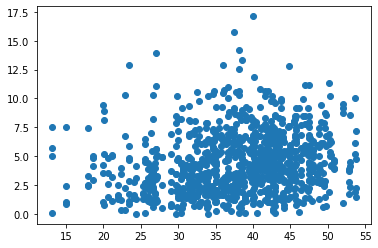

In [158]:
x_axis=mo_df['Soybean Yield']
y_axis=mo_df['Precipitation (Inches)']
plt.scatter(x_axis, y_axis)